# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

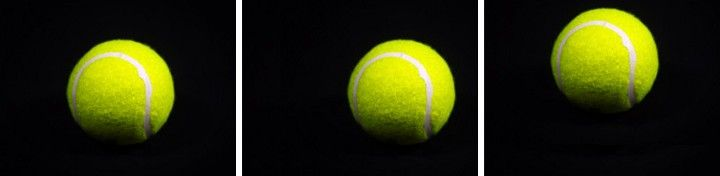



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [80]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

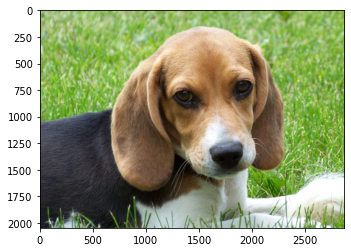

In [81]:
url = 'https://upload.wikimedia.org/wikipedia/commons/6/65/Cute_beagle_puppy_lilly.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


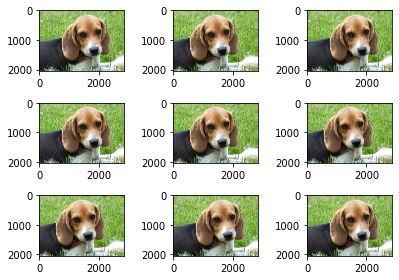

In [82]:
# We convert the image to an arrangement
data = img_to_array(img)
# we expand to a sample 
samples = expand_dims(data, 0)
# We created the data booster using just makeover 
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and show the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #converts to a valid value so that it can be displayed as an image 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

This factor is called rescale: rescaling factor (rescale=0./100)

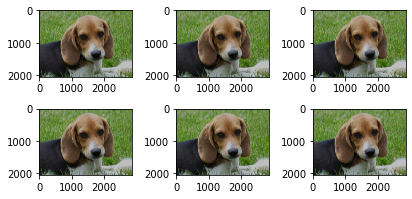

In [83]:
datagen = ImageDataGenerator(rescale=75./100)
it = datagen.flow(samples, batch_size= 1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()



An image rotation means inverting rows or columns of pixels in the case of a vertical or horizontal rotation, respectively. The increment is specified by a **horizontal_flip** or **vertical_flip** Boolean argument to the **ImageDataGenerator** class.

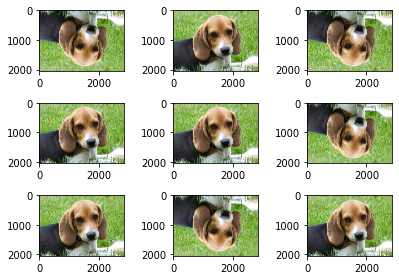

In [84]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled evenly randomly from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] = [1-zoom range, 1 zoom range]

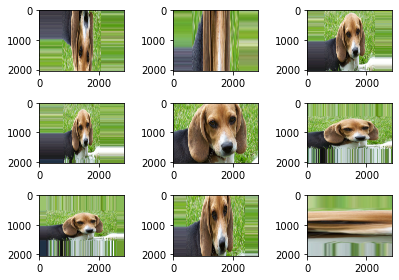

In [85]:
datagen = ImageDataGenerator(zoom_range=1.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise by a certain number of degrees from 0 to 360. You may rotate pixels outside the image frame and leave areas of the frame without pixel data, which need to be completed.

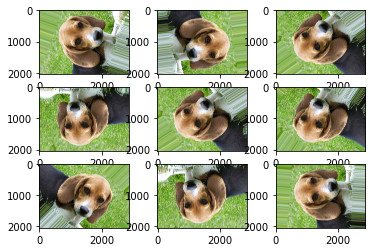

In [86]:
datagen = ImageDataGenerator(rotation_range=300)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

**horizontal flip** horizontal_flip: Boolean. Randomly flip inputs horizontally. in this case is not necesary because te image is in horizontally form, bot i decide puts like example.

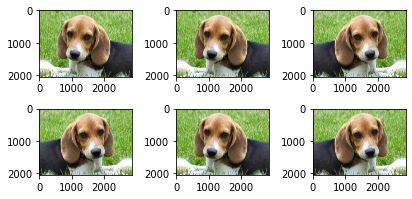

In [87]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**Validation split** validation_split :Fraction of images reserved for validation (strictly between 0 and 1).



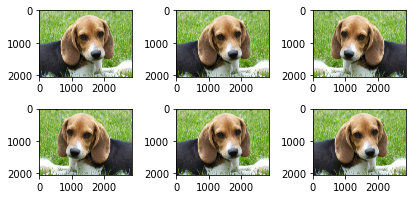

In [88]:
Datagen = ImageDataGenerator(validation_split=0.8)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**sher_range** shear_range: Shear Intensity (Shear angle in counter-clockwise direction in degrees).



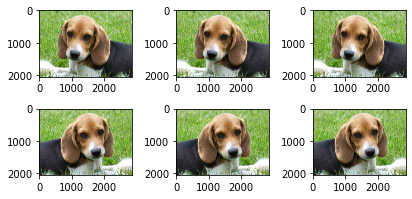

In [89]:

Datagen = ImageDataGenerator(shear_range=5.8)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**cval** cval: Float or Int. Value used for points outside.



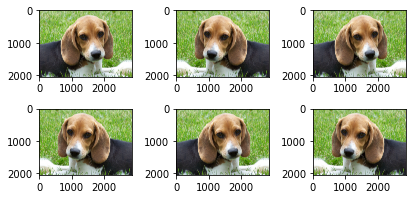

In [90]:
Datagen = ImageDataGenerator(cval=0.9)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**channel_shift_range** channel_shift_range: Float. Range for random channel shifts.



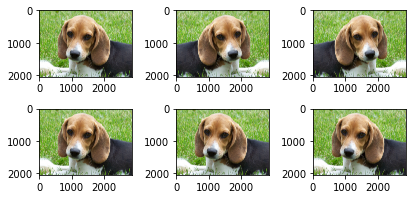

In [91]:
Datagen = ImageDataGenerator(channel_shift_range=0.7)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

**preprocessing_function** preprocessing_function: function that will be applied on each input. The function will run after the image is resized and augmented



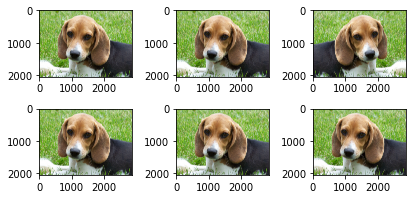

In [92]:
Datagen = ImageDataGenerator(preprocessing_function=23)
it = datagen.flow(samples, batch_size=1)
for i in range(6):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used. In many jobs, data augmentation is used to increase the amount of training images and improve the accuracy of the job.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

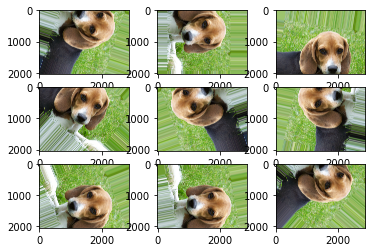

In [93]:
datagen = ImageDataGenerator(
            rotation_range               = 360,
            width_shift_range            = [100,100],   
            height_shift_range           = [500,500],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the work needed is not so simple given the inherent complexity of language (we cannot replace each word with its synonym and even if we do, we run the risk that the meaning of prayer will change completely.
There are some libraries that can help us do this, we will start by analyzing the following:

1.   Text Attack
2.   Google Trans

# TextAttack

It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on increasing data.



In [94]:
!pip install textattack

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter


In [103]:
text = "Before judging, make sure you are perfect."

TextAttack provides us with four methods for increasing data.

## WordNetAugmenter
Enlarges the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database of English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept. WordNet is superficially similar to a thesaurus, because it groups words according to their meaning.

In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

## EmbeddingAugmenter
Increases text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

## CharSwapAugmenter
Increases text by replacing, deleting, inserting, and exchanging adjacent characters.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)


## EasyDataAugmenter
This increases the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym inserts. All of these 4 functionalities occur randomly. Then we will get different results each time we execute the code. This returns 4 increased results, unlike the other methods.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)


Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the **translate ()** method are:

**src:** Source language This parameter is optional because gogletrans will detect it.

**dest:** target language. Parameter required.

**text:** the text to be translated from the source language to the target language. Parameter required.

By using this method what happens is a retranslation, we move from the original language to a target language and then back to the original, during this retrotranslation, there is a slight change in the sentence between the original text and the retrotranslated text, but the general meaning of prayer is still preserved.


Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, this becomes a bit of a problem of trial and error.


Some examples of languages:

*   Afrikáans	'af'

*   Chinese (simplificated) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese 'ja'
*   Latín	'la'


*   Spanish 'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [96]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 972kB 4.0MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 102kB 5.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=54a99ea46d51b59a1738925aa4f0f9aed3e690fe615aed516209a9205d017e74
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=97a4f6804f49ffcb8193e5229283e8c7024f038e66cf8cc50133e9cda89f688c
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [97]:
from googletrans import Translator
translator = Translator()

In [107]:
origin_text = "The life losts when you can't feel love anymore."
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='la').text
print(origin_text)
print(text_trans)
print(final)

The life losts when you can't feel love anymore.
La vida se pierde cuando ya no puedes sentir amor.
Vita est amor sentire perdidit cum non possit.


In [110]:
origin_text = "It doesn't matter how are you, black, withe, tall, slim,ugly or handsome like your father, what is important is the size of your heart."
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='la').text
print(origin_text)
print(text_trans)
print(final)

It doesn't matter how are you, black, withe, tall, slim,ugly or handsome like your father, what is important is the size of your heart.
No importa cómo seas, negro, blanco, alto, delgado, feo o guapo como tu padre, lo importante es el tamaño de tu corazón.
Nec refert, quam tu es, nigrum, album, procera, tenuis, deformis sive pulcher sicut Pater vester, quid refert magnitudinem cor tuum.


In [111]:
origin_text = "Huamns are not perfect, we make mistakes everyday of our entire life, but we can be better with every single mistake."
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='la').text
print(origin_text)
print(text_trans)
print(final)

Huamns are not perfect, we make mistakes everyday of our entire life, but we can be better with every single mistake.
Los humanos no somos perfectos, cometemos errores todos los días de toda nuestra vida, pero podemos ser mejores con cada error.
Homo perfectus non vita nostra quotidie peccamus, sed melius omnibus error.
